In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc




Accuracy: 90.30%


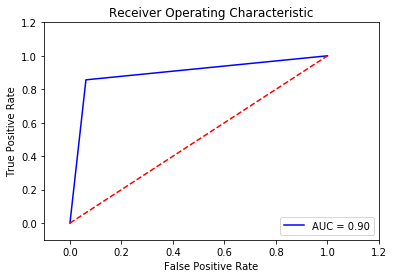

In [10]:
dataset = loadtxt('train_samplev2.csv', delimiter=",",  usecols=range(6))


# Open columns
X = dataset[:,0:5]
Y = dataset[:,5]


seed = 7
test_size = 0.80

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

size_actual = int(174723*test_size)

actual = dataset[:size_actual,5]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#plot ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


KeyError: 'device'

In [4]:
Y = df['is_attributed']
X = df.drop(['is_attributed','click_time','attributed_time'], axis = 1)

X.head()
X.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, train_size = 0.2, stratify = Y)

KeyError: 'is_attributed'

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel


0.997750124438
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     79818
          1       0.00      0.00      0.00       182

avg / total       1.00      1.00      1.00     80000

done


/Users/ZacBurns/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


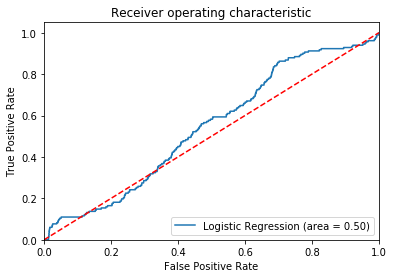

In [12]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
log_regaccuracy = log_reg.score(X_test, Y_test)

log_reg_probs = (log_reg.predict_proba(X_test))

log_reg_scores = cross_val_score(log_reg, X_train, Y_train, cv=10)
print(log_reg_scores.mean())

print(classification_report(Y_test, Y_pred))


print("done")

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



Out-of-bag score estimate: 0.997
Mean accuracy score: 0.998
0.9975625


NameError: name 'auc' is not defined

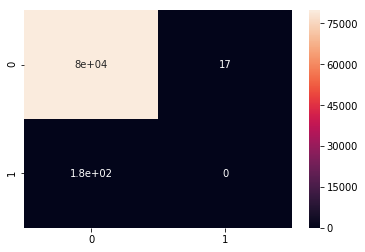

In [25]:
#Random Forest classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


rfc = RandomForestClassifier(n_estimators=100, criterion = "entropy", random_state=42, class_weight = {0:1, 1:9}, oob_score = True)
rfc = rfc.fit(X_train, Y_train)
#Y_pred = rfc.fit(X_train, Y_train).predict(X_test)

predicted = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)
print(f'Out-of-bag score estimate: {rfc.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


#rfc_predicted = rfc.predict(X_test)
#print(rfc_predicted)

rfc_score = rfc.score(X_test, Y_test)
print(rfc_score)

#rfc_probs = (rfc.predict_proba(X_test))
#print(rfc_probs)


rfc_cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(rfc_cm, annot=True)

acc = rfc.score(X_test,Y_test)

# get roc/auc info
Y_score = rfc.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(Y_test, Y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()






NameError: name 'tree_scores_ll' is not defined

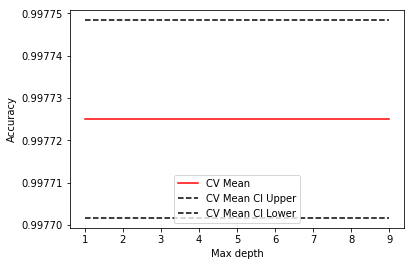

In [41]:
# Lists to store results
accuracies_CV_mean = []
accuracies_CV_std = []


# Depth values
depths = range(1, 10)

# Loop over depth values
for md in depths:
    tree = RandomForestClassifier(n_estimators=100, criterion = "entropy", random_state=42, class_weight = {0:1, 1:9} ,max_depth = md)    
    tree.fit(X_train, Y_train)
    #tree_pred = tree.predict(X_test)
    #tree_accuracy = tree.score(X_test, Y_test)
    #tree_probs = (tree.predict_proba(X_test))
    scores = cross_val_score(model_rfdt, X_test, Y_test, cv = 10, scoring = 'accuracy')
    accuracies_CV_mean.append(np.mean(scores))
    accuracies_CV_std.append(np.std(scores))

# Plot the Mean and Mean+/-Std
plt.plot(depths, accuracies_CV_mean, "r-", label="CV Mean")
plt.plot(depths, np.array(accuracies_CV_mean) + 2.093 * np.array(accuracies_CV_std) / np.sqrt(20), "k--", label="CV Mean CI Upper")
plt.plot(depths, np.array(accuracies_CV_mean) - 2.093 * np.array(accuracies_CV_std) / np.sqrt(20), "k--", label="CV Mean CI Lower")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()




#tree = RandomForestClassifier(n_estimators=100, criterion = "entropy", random_state=42, class_weight = "balanced",max_depth = md)
#tree.fit(X_train, Y_train)
#tree_pred = tree.predict(X_test)
#tree_accuracy = tree.score(X_test, Y_test)
#tree_probs = (tree.predict_proba(X_test))



tree_scores_acc = cross_val_score(tree, X_train, Y_train, cv=10, scoring='accuracy')
tree_scores_avgp = cross_val_score(tree, X_train, Y_train, cv=10, scoring='average_precision')
tree_scores_rec = cross_val_score(tree, X_train, Y_train, cv=10, scoring='recall')

print((tree_scores_acc.mean(),tree_scores_ll.mean(), tree_scores_rec))

In [38]:
from sklearn.feature_selection import SelectKBest

tree = RandomForestClassifier(n_estimators=100, criterion = "entropy", random_state=42, class_weight = "balanced",max_depth = md)
tree = tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
tree_accuracy = tree.score(X_test, Y_test)
tree_probs = (tree.predict_proba(X_test))

def selectKImportance(tree, X_train, k=5):
     return X_train[:,tree.feature_importances_.argsort()[::-1][:k]]
    
print(selectKImportance())



NameError: name 'md' is not defined

In [34]:
scores = []

for md in range(1,10):
    tree = RandomForestClassifier(n_estimators=100, criterion = "entropy", random_state=42, class_weight = "balanced",max_depth = md, oob_score = True)
    validated = cross_val_score(tree, X_test, Y_test, cv = 10, scoring = "accuracy" )
    scores.append(validated)
    

sns.boxplot(scores)
plt.xlabel("Number of trees")
plt.ylabel("F1 Score")
plt.title("F1 Scores as a function of Number of Trees")
plt.show()


KeyboardInterrupt: 

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def roc_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    plt.title(model_name+'Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

def lift_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: Cummulative Gain Chart and Lift Curve
    """
    actual = pd.Series(actual)
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr=(tpr*actual.sum()+fpr*(actual.count()-actual.sum()))/actual.count()
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name+'Lift Curve')

In [30]:
roc_plot(Y_test, tree_probs[:,-1], 'tree')

roc_plot(Y_test, log_reg_probs[:,-1], 'tree')

NameError: name 'roc_plot' is not defined

In [55]:
import xgboost as xgb
print('done')

done


[  2.88299980e-05   2.51826074e-04   6.77126491e-06 ...,   2.46674444e-05
   9.86004488e-06   3.66916822e-04]


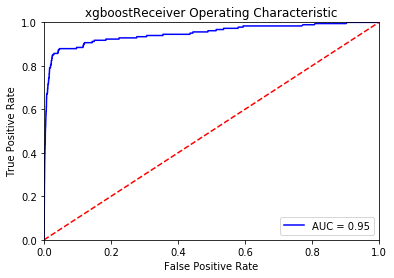

In [75]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix(X_train,Y_train)
dtest = xgb.DMatrix(X_test,Y_test)
# specify parameters via map
param = {'max_depth':7, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 25
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
print(preds)

roc_plot(Y_test, preds, 'xgboost')

